In [71]:
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib inline

In [11]:
pd.Series([1.,2.,3.], index=['a','b','c'])

a    1.0
b    2.0
c    3.0
dtype: float64

In [12]:
pd.Series([1,2,np.nan])

0    1.0
1    2.0
2    NaN
dtype: float64

In [14]:
# Create Data frame
h = [[1,2],[3,4]]
df_h = pd.DataFrame(h)

In [16]:
print('Data Frame:', df_h)

Data Frame:    0  1
0  1  2
1  3  4


In [17]:
## pandas to numpy
df_h_n = np.array(df_h)

In [20]:
print('Numpy array:', df_h_n)

Numpy array: [[1 2]
 [3 4]]


## Range Data

In [23]:
dates_d = pd.date_range('20300101', periods=6, freq='D')

In [24]:
dates_d

DatetimeIndex(['2030-01-01', '2030-01-02', '2030-01-03', '2030-01-04',
               '2030-01-05', '2030-01-06'],
              dtype='datetime64[ns]', freq='D')

In [25]:
date_m = pd.date_range('20300101', periods=6, freq='M')

In [26]:
date_m

DatetimeIndex(['2030-01-31', '2030-02-28', '2030-03-31', '2030-04-30',
               '2030-05-31', '2030-06-30'],
              dtype='datetime64[ns]', freq='M')

## Inspecting data

In [30]:
# create a random sequence with numpy. 4 columns and 6 rows
random = np.random.randn(6,4)

In [31]:
# Create data with date
df = pd.DataFrame(random, index=date_m, columns=list('ABCD'))

In [32]:
df

,A,B,C,D
2030-01-31,-0.989708,-0.432023,-0.035269,1.619007
2030-02-28,1.416277,0.087426,-0.593452,-1.583348
2030-03-31,-1.330705,-0.738256,-1.461585,-0.821315
2030-04-30,1.254510,0.980948,-0.079063,0.155791
2030-05-31,0.424413,-1.417527,1.588978,-0.180403
2030-06-30,0.748424,0.155527,-1.776689,-0.919856


In [33]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.253868,-0.227317,-0.392847,-0.288354
std,1.156158,0.827659,1.204277,1.114163
min,-1.330705,-1.417527,-1.776689,-1.583348
25%,-0.636177,-0.661698,-1.244552,-0.895220
50%,0.586419,-0.172298,-0.336258,-0.500859
75%,1.127988,0.138502,-0.046217,0.071742
max,1.416277,0.980948,1.588978,1.619007


In [34]:
# selecting column by name using loc
df.loc[:,['A','B']]

,A,B
2030-01-31,-0.989708,-0.432023
2030-02-28,1.416277,0.087426
2030-03-31,-1.330705,-0.738256
2030-04-30,1.254510,0.980948
2030-05-31,0.424413,-1.417527
2030-06-30,0.748424,0.155527


In [35]:
df[['A','B']]

,A,B
2030-01-31,-0.989708,-0.432023
2030-02-28,1.416277,0.087426
2030-03-31,-1.330705,-0.738256
2030-04-30,1.254510,0.980948
2030-05-31,0.424413,-1.417527
2030-06-30,0.748424,0.155527


In [37]:
# using the index instade of the column
df.iloc[:,:2]

,A,B
2030-01-31,-0.989708,-0.432023
2030-02-28,1.416277,0.087426
2030-03-31,-1.330705,-0.738256
2030-04-30,1.254510,0.980948
2030-05-31,0.424413,-1.417527
2030-06-30,0.748424,0.155527


In [38]:
#drop a column
df.drop(columns=['A','C'])

,B,D
2030-01-31,-0.432023,1.619007
2030-02-28,0.087426,-1.583348
2030-03-31,-0.738256,-0.821315
2030-04-30,0.980948,0.155791
2030-05-31,-1.417527,-0.180403
2030-06-30,0.155527,-0.919856


In [39]:
# Concatenation
df1 = pd.DataFrame({'name':['John','Smith','Paul'],
                   'Age':['25','30','50']},
                   index=[0,1,2])
df2 = pd.DataFrame({'name':['Adam', 'Smith'],
                    'Age':['26','11']},
                  index=[3,4])

In [40]:
df1

,name,Age
0,John,25
1,Smith,30
2,Paul,50


In [41]:
df2

,name,Age
3,Adam,26
4,Smith,11


In [42]:
df_concat = pd.concat([df1,df2])

In [43]:
df_concat

,name,Age
0,John,25
1,Smith,30
2,Paul,50
3,Adam,26
4,Smith,11


In [44]:
df_concat.drop_duplicates('name')

,name,Age
0,John,25
1,Smith,30
2,Paul,50
3,Adam,26


In [49]:
df_concat.sort_values('Age')

,name,Age
4,Smith,11
0,John,25
3,Adam,26
1,Smith,30
2,Paul,50


In [50]:
df_concat.rename(columns={"name":"Surname", "Age":"Age_ppl"})

,Surname,Age_ppl
0,John,25
1,Smith,30
2,Paul,50
3,Adam,26
4,Smith,11


## Import CSV using pandas

In [51]:
COLUMNS = ['age','workclass', 'fnlwgt', 'education', 'education_num', 'marital',
           'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
           'hours_week', 'native_country', 'label']

In [52]:
PATH = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

In [53]:
df_train = pd.read_csv(PATH,
                       skipinitialspace=True,
                       names = COLUMNS,
                       index_col=False)

In [55]:
df_train.shape

(32561, 15)

### Groupby

* count
* min
* max
* mean
* median
* standard deviation: sdt

In [58]:
df_train.groupby(['label']).mean()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_week
label,,,,,,
<=50K,36.783738,190340.86517,9.595065,148.752468,53.142921,38.840210
>50K,44.249841,188005.00000,11.611657,4006.142456,195.001530,45.473026


In [60]:
df_train.groupby(['label'])['age'].min()

label
<=50K    17
>50K     19
Name: age, dtype: int64

In [62]:
df_train.groupby(['label', 'marital'])['capital_gain'].max()

label  marital              
<=50K  Divorced                 34095
       Married-AF-spouse         2653
       Married-civ-spouse       41310
       Married-spouse-absent     6849
       Never-married            34095
       Separated                 7443
       Widowed                   6849
>50K   Divorced                 99999
       Married-AF-spouse         7298
       Married-civ-spouse       99999
       Married-spouse-absent    99999
       Never-married            99999
       Separated                99999
       Widowed                  99999
Name: capital_gain, dtype: int64

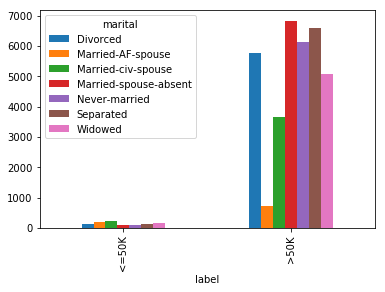

In [90]:
%matplotlib inline
# fig, ax = plt.subplots(figsize=(15,7))
df_plot = df_train.groupby(['label', 'marital'])['capital_gain'].mean() #.unstack()
df_plot.unstack().plot.bar()

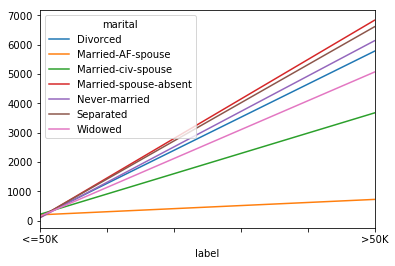

In [91]:
df_plot.unstack().plot()

In [93]:
PATH = "https://drive.google.com/open?id=1YXmEVZM70s4R4EkZ193ziDeTpPJt-0h7"
COLUMNS = ["date", "Values"]

In [97]:
df_test = pd.read_csv(PATH,
                       skipinitialspace=True,
                       names = COLUMNS)#,                       index_col=False)

In [98]:
df_test

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,date,Values
"<!DOCTYPE html><html><head><meta name=""google"" content=""notranslate""><meta http-equiv=""X-UA-Compatible"" content=""IE=edge;""><style>@font-face{font-family:'Roboto';font-style:italic;font-weight:400;src:local('Roboto Italic')",local('Roboto-Italic'),url(//fonts.gstatic.com/s/roboto/v18/KFOkCnqEu92Fr1Mu51xIIzc.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:300;src:local('Roboto Light'),local('Roboto-Light'),url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmSU5fBBc9.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:400;src:local('Roboto Regular'),local('Roboto-Regular'),url(//fonts.gstatic.com/s/roboto/v18/KFOmCnqEu92Fr1Mu4mxP.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:700;src:local('Roboto Bold'),local('Roboto-Bold'),"url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmWUlfBBc9.ttf)format('truetype');}</style><meta name=""referrer"" content=""origin""><title>max.csv - Google Drive</title><meta property=""og:title"" content=""max.csv""><meta property=""og:type"" content=""article""><meta property=""og:site_name"" content=""Google Docs""><meta property=""og:url"" content=""https://drive.google.com/file/d/1YXmEVZM70s4R4EkZ193ziDeTpPJt-0h7/view?usp=drive_open&amp;usp=embed_facebook""><link rel=""shortcut icon"" href=""https://ssl.gstatic.com/docs/doclist/images/icon_14_text_favicon.ico""><link href=""https://fonts.googleapis.com/css?family=Google+Sans"" rel=stylesheet><link rel=""stylesheet"" href=""https://www.gstatic.com/_/apps-fileview/_/ss/k=apps-fileview.v.8bs74LepFzU.L.X.O/d=0/rs=AO0039tOr1WvAwTJpbwpnfh29bM-wZ-ugg""><script>_docs_flag_initialData={""docs-ails"":""docs_cold""","docs-fwds:""docs_sdf""","docs-crs:""docs_crs_nfd""","docs-tfh:""""",info_params:{},"docosEmbedApiJs:""//docs.google.com/comments/d/AAHRpnXuGzsysyOuxf3xFKM71ARQeByl61HjrDfrRzv3_8fTtjnRRinj2ttrUYxjFULLVJzoh60CWOAAglX316FKZ1jMPbEgkEQ/api/js?hl\u003den""",docs-edcsp:false,docs-eohmo:false,"uls:""""",docs-ce:false,docs-api-keys:{},"buildLabel:""texmex_2019.22-Wed_RC01""",docs-show_debug_info:false,"ondlburl:""https://docs.google.com""","drive_url:""https://drive.google.com""","app_url:""https://drive.google.com/file/""",docs-mid:2048,docs-eicd:false,docs-icdmt:[],"docs-sup:""/file""","docs-seu:""https://drive.google.com/file/d/1YXmEVZM70s4R4EkZ193ziDeTpPJt-0h7/edit""",docs-ecvca:true,"docs-uptc:[""lsrp""",ca,sh,noreplica,ouid,dl,dods,usp,urp,utm_source,utm_medium,utm_campaign,utm_term,utm_content,sle],"docs-doddn:""""","docs-dodn:""""","docs-uddn:""""","docs-udn:""""","docs-cwsd:""""","docs-gsmd:""""",docs-epil:false,docs-al:[0,0,0,1,0],"docs-deculmu:""""","docs-deuoflmu:""""","docs-deodlmu:""""",docs-eaclivu:false,"docs-ndt:""Untitled Texmex""","docs-prn:""""",docs-sfcnidt:false,docs-ecat:false,docs-sfcnidtwi:false,"docs-as:""""","docs-ack:""""",docs-etdimo:false,"docs-mdck:""""",docs-etiff:false,docs-spfe:true,docs-mriim:1800000,docs-eccbs:false,docos-sosj:false,docs-rlmp:false,docs-mmpt:15000,docs-erd:false,docs-erfar:false,docs-ensb:false,docs-ddts:false,docs-uootuns:false,docs-amawso:false,docs-mdso:false,docs-ofmpp:false,docs-anlpfdo:false,"docs-pid:""""",docs-ebbouf:false,docs-efs:false,docs-ricocpb:false,docs-eali:false,docs-ecaws:false,docs-etauihm:false,docs-egs:false,docs-eeott:false,docs-efoecc:false,docs-eaccm:false,docs-edp2:false,docs-eac:false,docs-camxbtim:15000,docs-camnbtim:5000,docs-edsi:false,docs-edp:false,docs-edlo:false,docs-ecas:false,docs-eust:false,docs-offline-enccpd:false,docs-esdr:false,docs-edsl:fa